In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

# %matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
df_RT = pd.read_csv('Rt/Rt_cases_2021_05_11.csv',delimiter=';')

df_RT["SampleDate"] = df_RT["SampleDate"].astype('datetime64[D]')
df_RT['estimate'] = pd.to_numeric(df_RT["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_lower'] = pd.to_numeric(df_RT["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_upper'] = pd.to_numeric(df_RT["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

df_RT

#allFiles = os.listdir('Rt/')

#for curFile in allFiles:
#    # print(curFile)
#    df = pd.read_csv('Rt/'+curFile,delimiter=';')
#
#    if (df.columns[0] == 'date_sample'):
#        df["date_sample"] = df["date_sample"].astype('datetime64[D]')
#        curDates = df.date_sample
#    else:
#        df["SampleDate"] = df["SampleDate"].astype('datetime64[D]')
#        curDates = df.SampleDate
#    df['estimate'] = pd.to_numeric(df["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
#    df['uncertainty_lower'] = pd.to_numeric(df["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
#    df['uncertainty_upper'] = pd.to_numeric(df["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))
#    
#    plt.plot(curDates,np.ones(curDates.shape),'b--')
#    plt.plot(curDates,df.estimate,color=[0,0,0,0.2])

SampleDate  estimate  uncertainty_lower  uncertainty_upper
0   2020-03-26       0.8                0.6                1.0
1   2020-03-27       0.8                0.7                1.0
2   2020-03-28       0.8                0.7                1.0
3   2020-03-29       0.8                0.6                1.0
4   2020-03-30       0.8                0.6                1.0
5   2020-03-31       0.8                0.6                0.9
6   2020-04-01       0.8                0.6                0.9
7   2020-04-02       0.8                0.6                0.9
8   2020-04-03       0.8                0.6                0.9
9   2020-04-04       0.8                0.6                0.9
10  2020-04-05       0.8                0.6                0.9
11  2020-04-06       0.8                0.6                0.9
12  2020-04-07       0.7                0.6                0.9
13  2020-04-08       0.7                0.6                0.9
14  2020-04-09       0.7                0.6                0.9
15  2020-04-10       0.7                0.6                0.9
16  2020-04-11       0.7                0.6                0.9
17  2020-04-12       0.7                0.6                0.8
18  2020-04-13       0.7                0.5                0.8
19  2020-04-14       0.7                0.5                0.8
20  2020-04-15       0.7                0.5                0.8
21  2020-04-16       0.7                0.5                0.8
22  2020-04-17       0.7                0.5                0.8
23  2020-04-18       0.7                0.5                0.8
24  2020-04-19       0.7                0.6                0.8
25  2020-04-20       0.7                0.6                0.8
26  2020-04-21       0.7                0.6                0.8
27  2020-04-22       0.7                0.6                0.9
28  2020-04-23       0.8                0.6                0.9
29  2020-04-24       0.8                0.6                0.9
30  2020-04-25       0.8                0.6                0.9
31  2020-04-26       0.8                0.6                0.9
32  2020-04-27       0.8                0.6                0.9
33  2020-04-28       0.8                0.6                0.9
34  2020-04-29       0.8                0.7                0.9
35  2020-04-30       0.8                0.7                0.9
36  2020-05-01       0.8                0.7                0.9
37  2020-05-02       0.8                0.6                0.9
38  2020-05-03       0.8                0.7                0.9
39  2020-05-04       0.8                0.7                0.9
40  2020-05-05       0.8                0.7                0.9
41  2020-05-06       0.8                0.7                1.0
42  2020-05-07       0.8                0.7                1.0
43  2020-05-08       0.9                0.7                1.0
44  2020-05-09       0.8                0.7                1.0
45  2020-05-10       0.9                0.7                1.0
46  2020-05-11       0.8                0.7                1.0
47  2020-05-12       0.8                0.7                1.0
48  2020-05-13       0.8                0.7                1.0
49  2020-05-14       0.8                0.7                1.0
50  2020-05-15       0.9                0.7                1.0
51  2020-05-16       0.8                0.7                1.0
52  2020-05-17       0.9                0.7                1.0
53  2020-05-18       0.9                0.7                1.0
54  2020-05-19       0.9                0.7                1.0
55  2020-05-20       0.9                0.7                1.0
56  2020-05-21       0.9                0.7                1.0
57  2020-05-22       0.9                0.8                1.0
58  2020-05-23       0.9                0.8                1.0
59  2020-05-24       0.9                0.8                1.0
60  2020-05-25       0.9                0.8                1.0
61  2020-05-26       0.9                0.8                1.0
62  2020-05-27       0.9           

In [4]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"/" + ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv


In [5]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe  0-9  10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89 90+ I alt
13_04_2021    396    342   939   662   638   575   271   162    45   7  4552
20_04_2021    582    395   982   785   746   644   301   137    21  10  5196
27_04_2021    520    362   889   724   755   656   289   112    30   4  4885
04_05_2021    477    390  1204   836   827   699   372   120    16   6  5532
11_05_2021    503    538  1416   942   926   786   377   107    26   1  6431

In [6]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []


#a_list = list(range(0, 100, 10))
#for i, a in enumerate(a_list):
#    if a == a_list[-1]:
#        DK_age.append(dfAges.iloc[a:].Antal.sum())
#    else:
#        DK_age.append(dfAges.iloc[a:a_list[i+1]].Antal.sum())
#DK_age.append(dfAges.Antal.sum())

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())


DK_age = np.array(DK_age)
DK_age

case_hosp_rate = np.array([i/100 for i in [0, 1, 2, 4, 6, 8, 13, 22, 40, 40]])

# 0-29, 30-69, 70-
immune_rate = np.array([0.1]*3 + [0.07]*2 + [0.06]*5)

In [7]:
# Vaccinationskalender, manuelt aflæst 12/05-2021
vaccKal = pd.DataFrame()

neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate]
vaccKal['10-19'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-14'),np.datetime64('2021-07-19')]
vaccKal['20-29'] = [np.datetime64('2021-06-14'),np.datetime64('2021-07-19'),np.datetime64('2021-08-31')]
vaccKal['30-39'] = [np.datetime64('2021-06-21'),np.datetime64('2021-08-01'),np.datetime64('2021-08-31')]
vaccKal['40-49'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-28'),np.datetime64('2021-08-02')]
vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-05-31'),np.datetime64('2021-07-05')]
vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-24'),np.datetime64('2021-06-28')]
vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-04-26'),np.datetime64('2021-05-31')]
vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-03-29'),np.datetime64('2021-04-26')]
vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]
# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate]

vaccKal

0-9      10-19      20-29      30-39      40-49      50-59  \
0 2021-10-30 2021-05-24 2021-06-14 2021-06-21 2021-05-24 2021-05-03   
1 2021-10-30 2021-06-14 2021-07-19 2021-08-01 2021-06-28 2021-05-31   
2 2021-10-30 2021-07-19 2021-08-31 2021-08-31 2021-08-02 2021-07-05   

       60-69      70-79      80-89        90+      I alt  
0 2021-04-05 2021-03-29 2021-02-01 2021-02-01 2021-10-30  
1 2021-05-24 2021-04-26 2021-03-29 2021-02-22 2021-10-30  
2 2021-06-28 2021-05-31 2021-04-26 2021-03-15 2021-10-30

In [8]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



Unnamed: 0        Dato         0-9       10-19  20-29  30-39       40-49  \
356         356  2021-05-10   66.333333   71.333333  174.0  118.0  122.666667   
357         357  2021-05-11  100.000000   78.400000  172.0  137.0  139.000000   
358         358  2021-05-12  103.000000  126.000000  256.0  176.0  151.000000   
359         359  2021-05-13   85.000000  107.600000  278.0  157.5  154.000000   
360         360  2021-05-14   85.000000  107.600000  278.0  157.5  154.000000   

          50-59      60-69  70-79     80-89  90+        I alt  
356  104.333333  47.333333   14.0  2.666667  0.0   827.666667  
357  100.000000  60.000000   14.0  6.000000  1.0   925.000000  
358  153.000000  69.000000   19.0  3.000000  1.0  1246.000000  
359  131.500000  57.500000   17.0  2.000000  1.5  1153.000000  
360  131.500000  57.500000   17.0  2.000000  1.5  1153.000000

In [9]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

def contact_number(t_list, vcal, RT):
    x1, x2, t_shift = 0.5, 0.95, np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            rt, dt, tspan = time_intervals(vcal[1], t, vcal[2])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[2] <= t:
            ret[i] = RT*(1-x2)
        # print(ret[i])
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000):
    cn = contact_number(t_list, vcal, RT)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        #ret[i] = ret[i-1]*c**(gen_time*dt)
        ret[i] = ret[i-1]*(c**(gen_time*dt))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


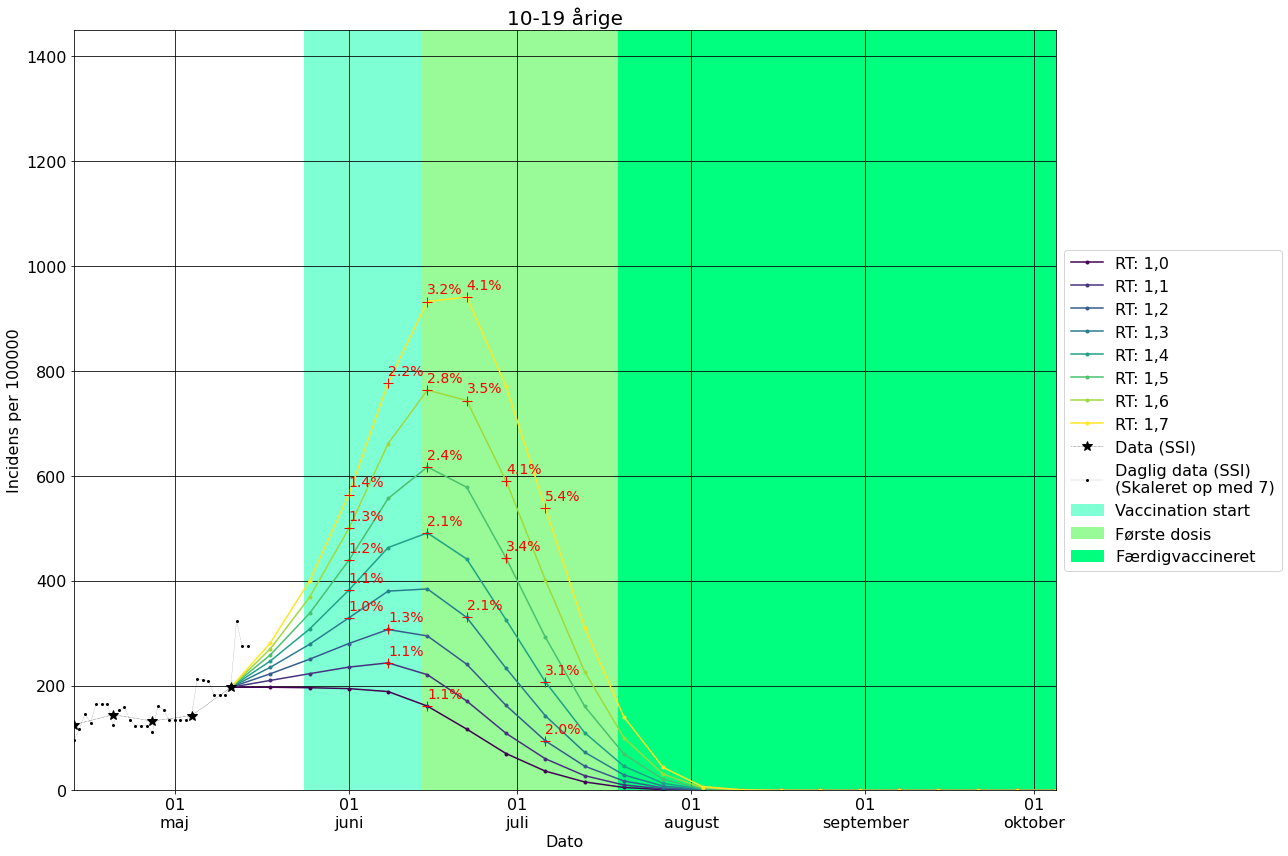

In [10]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]
curImmuneRate = immune_rate[i]


# Use latest day with data
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]

# Get vaccination dates from calendar
vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

# Plot vaccination
#curMax = max(curData)
ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

# Generation time (4.7 days), in units of weeks 
genTime = 4.7 / 7 

# Go through a number of RT's
allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    # Make prediction with current RT
    # modelCount = iniCount * (curRT**(genTime*tSpan))
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    #pct_dots(ax1, tSpanPlot, modelCount2, curPopSize)

    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


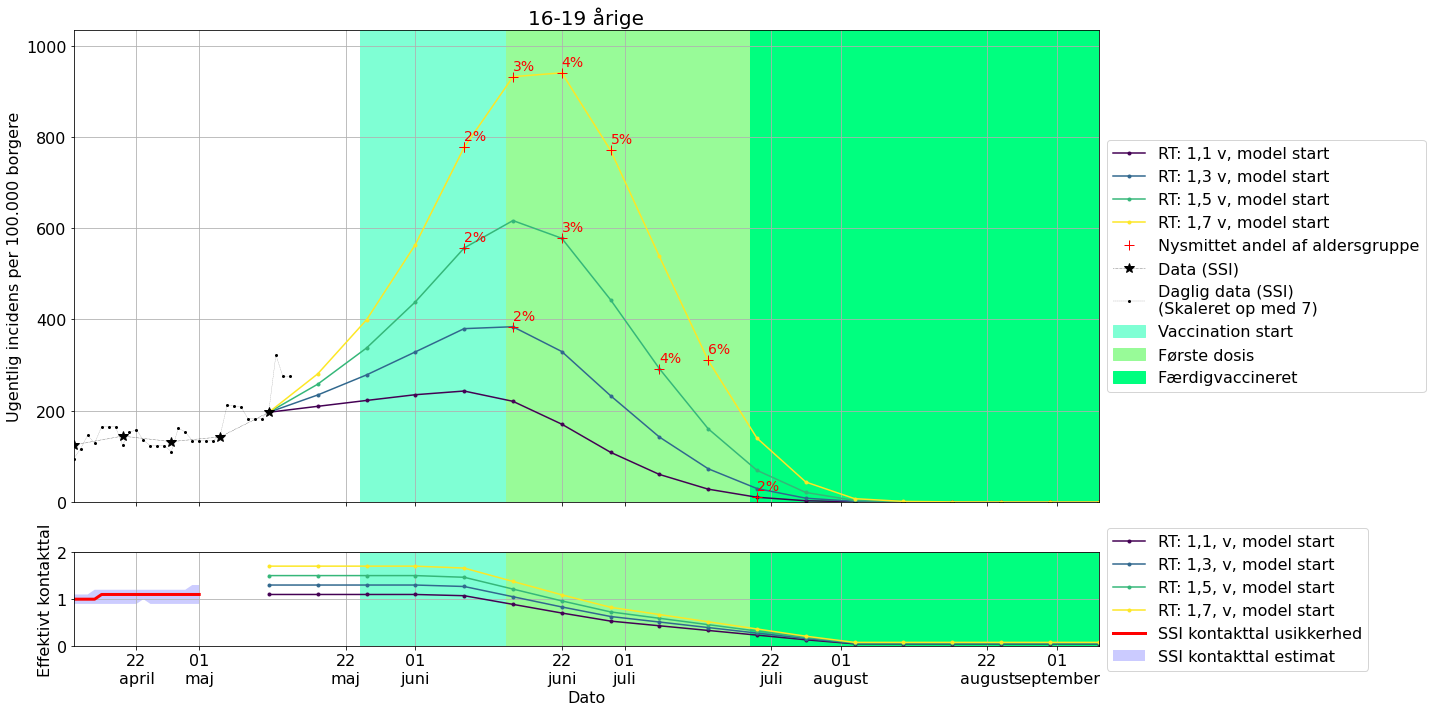

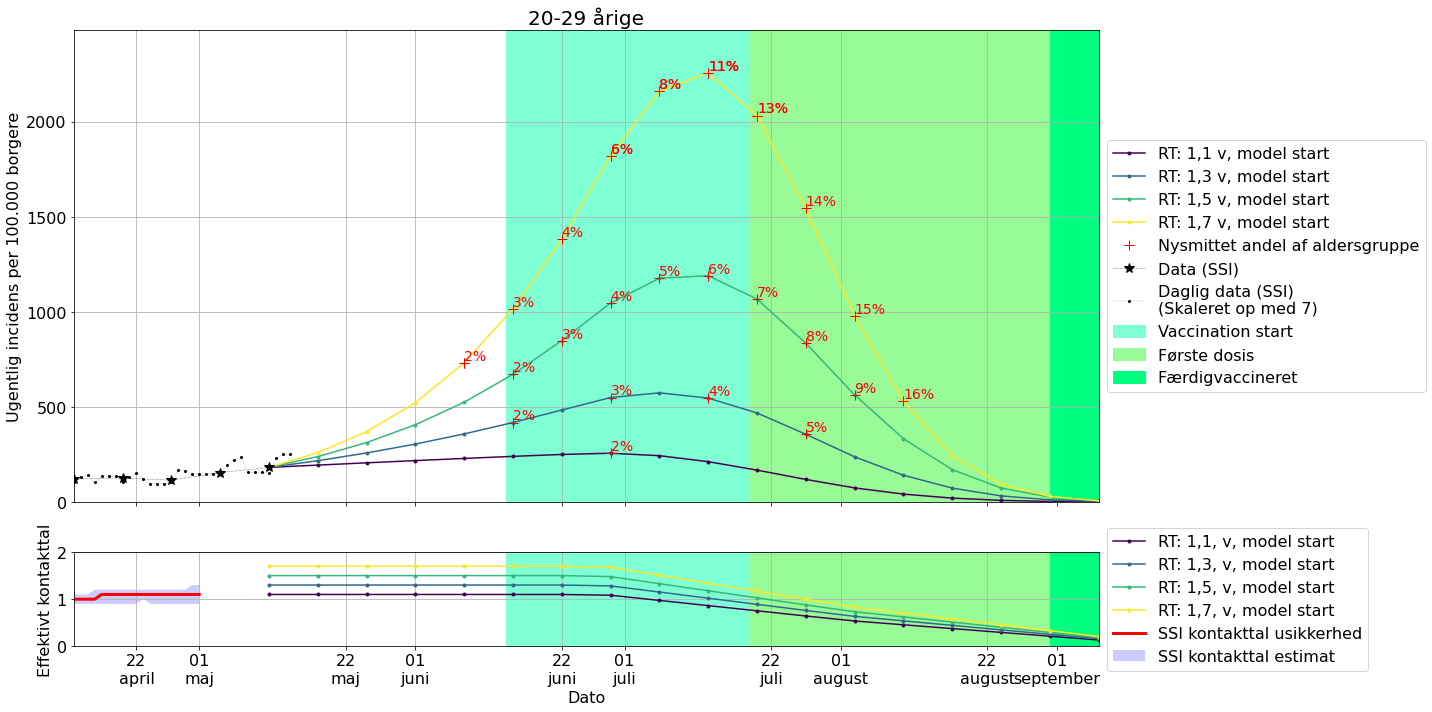

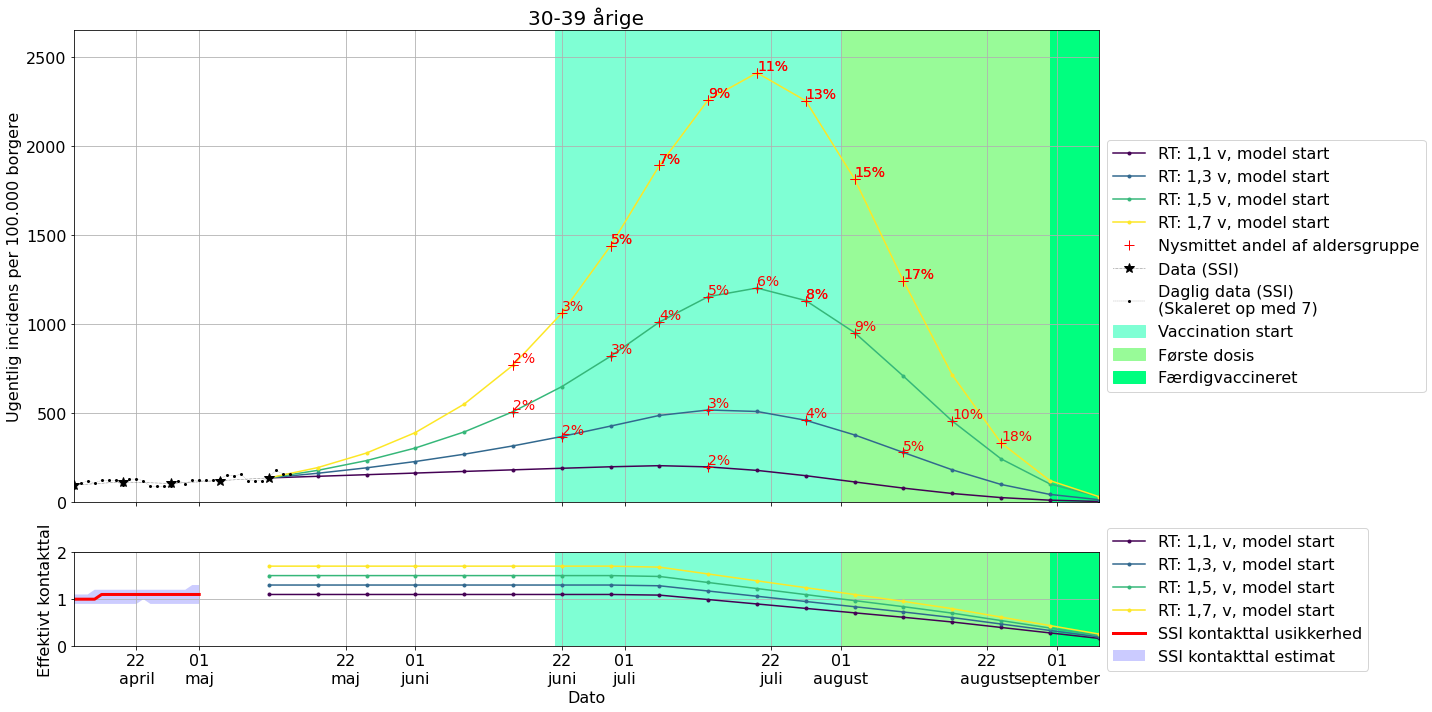

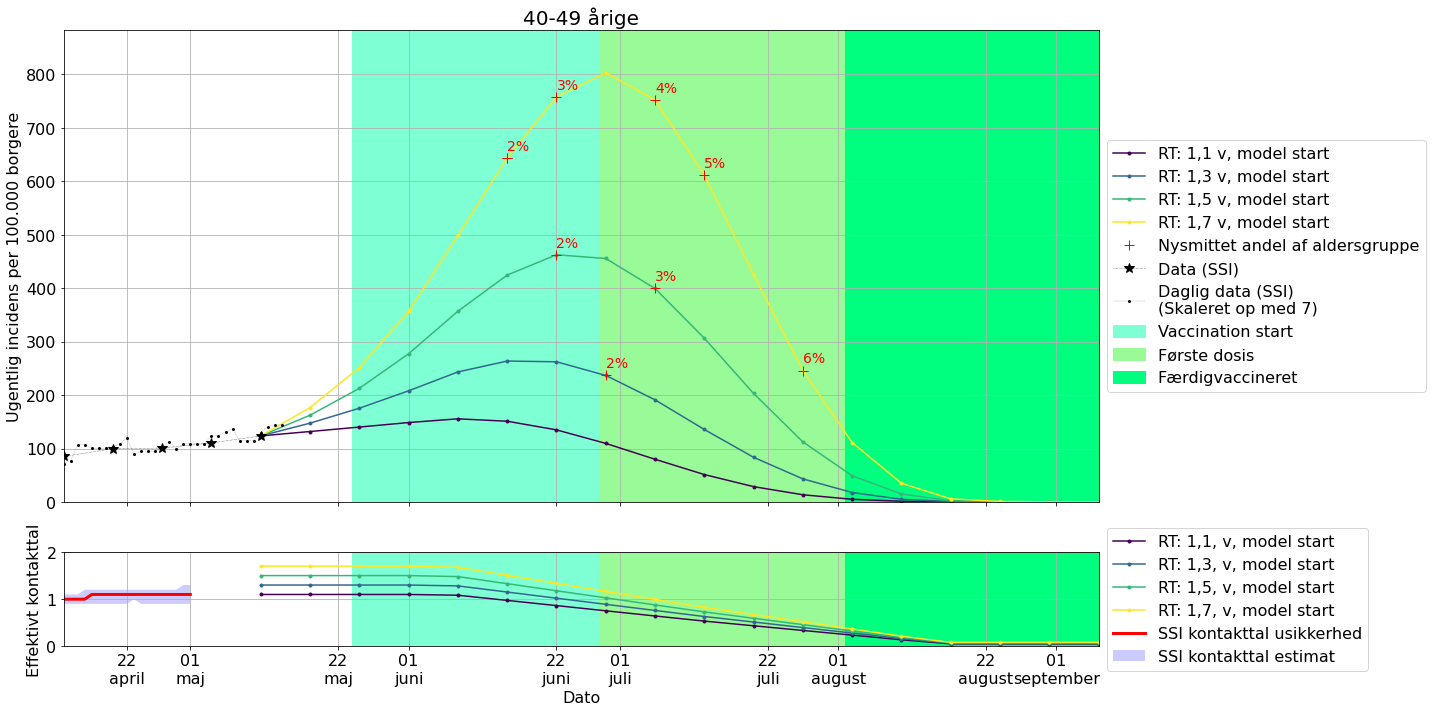

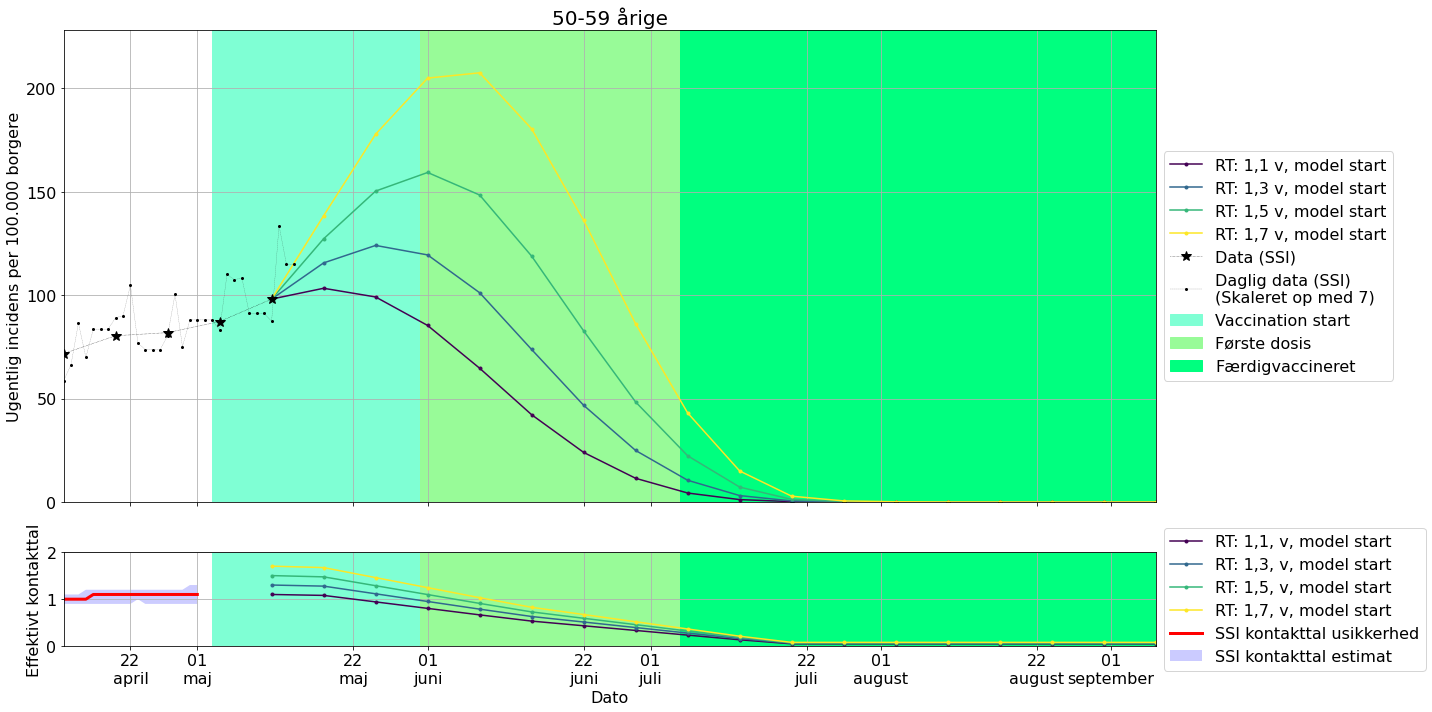

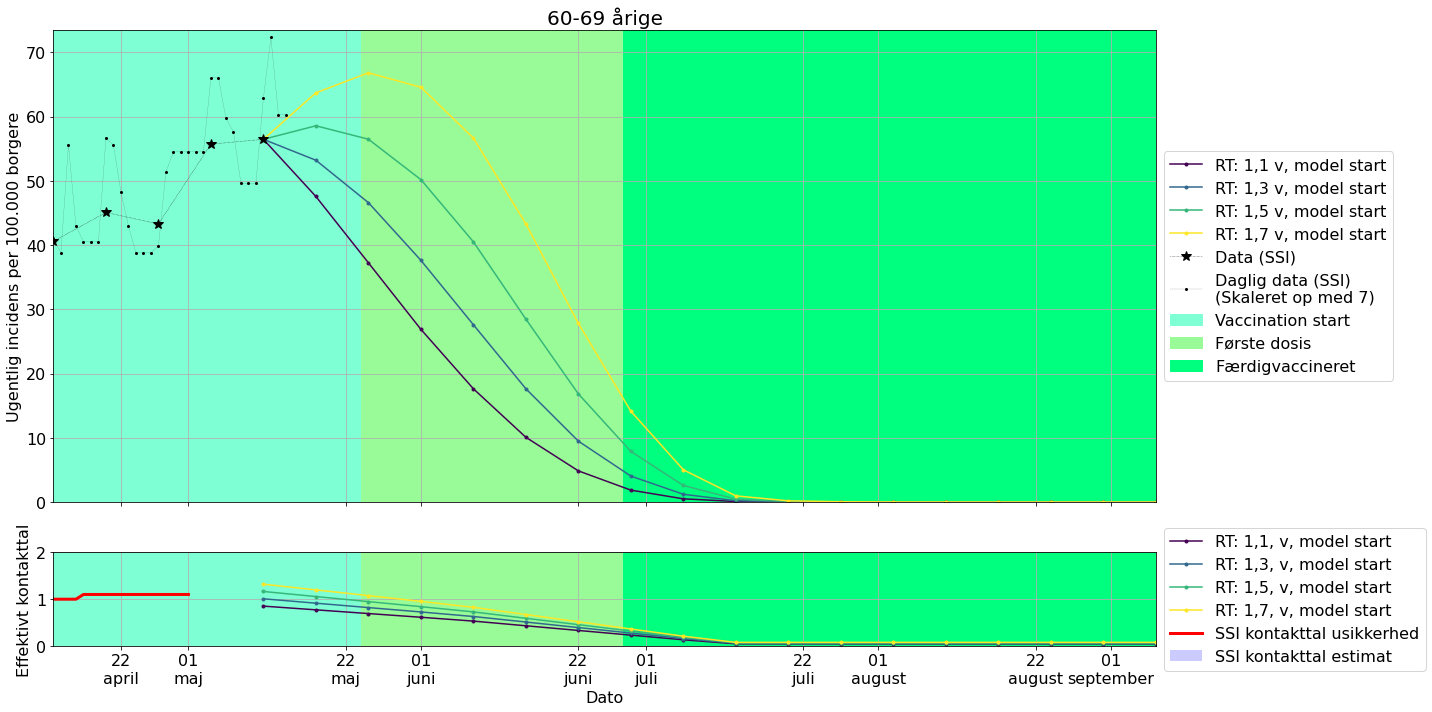

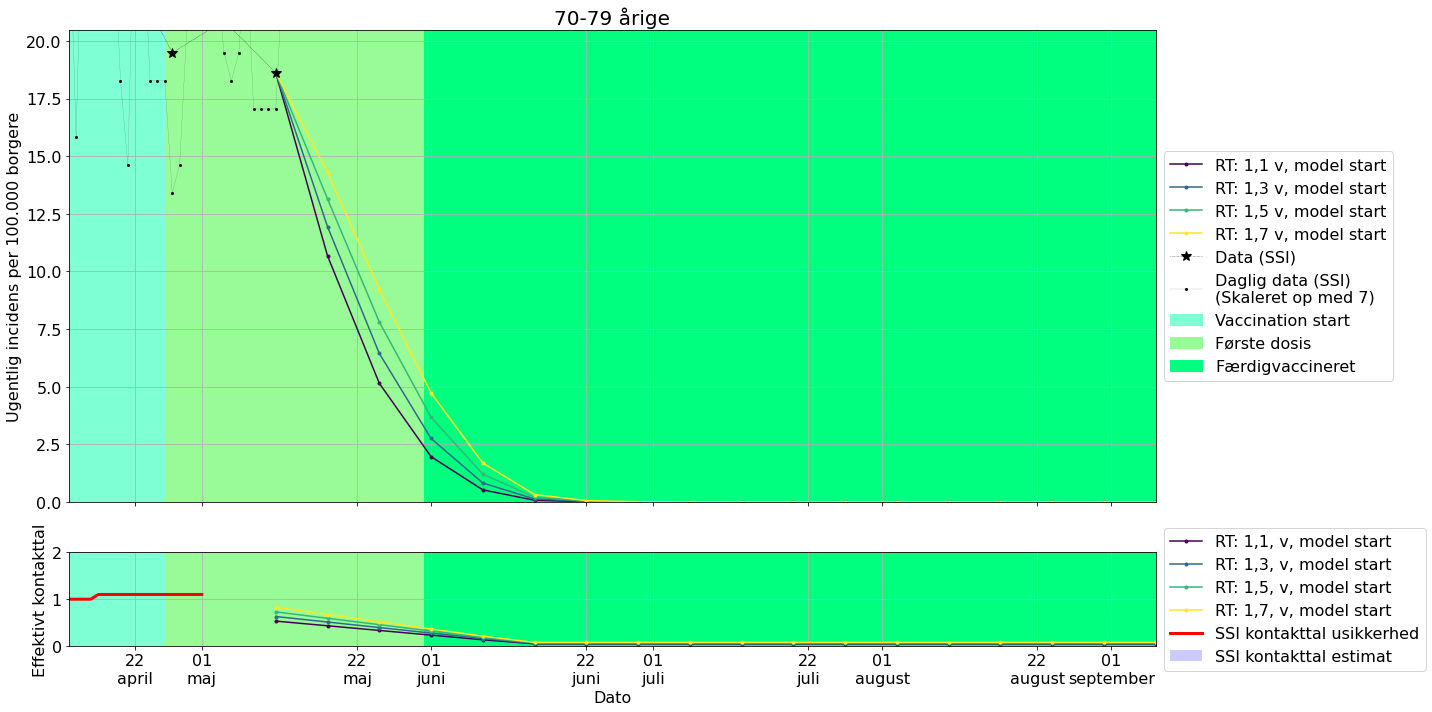

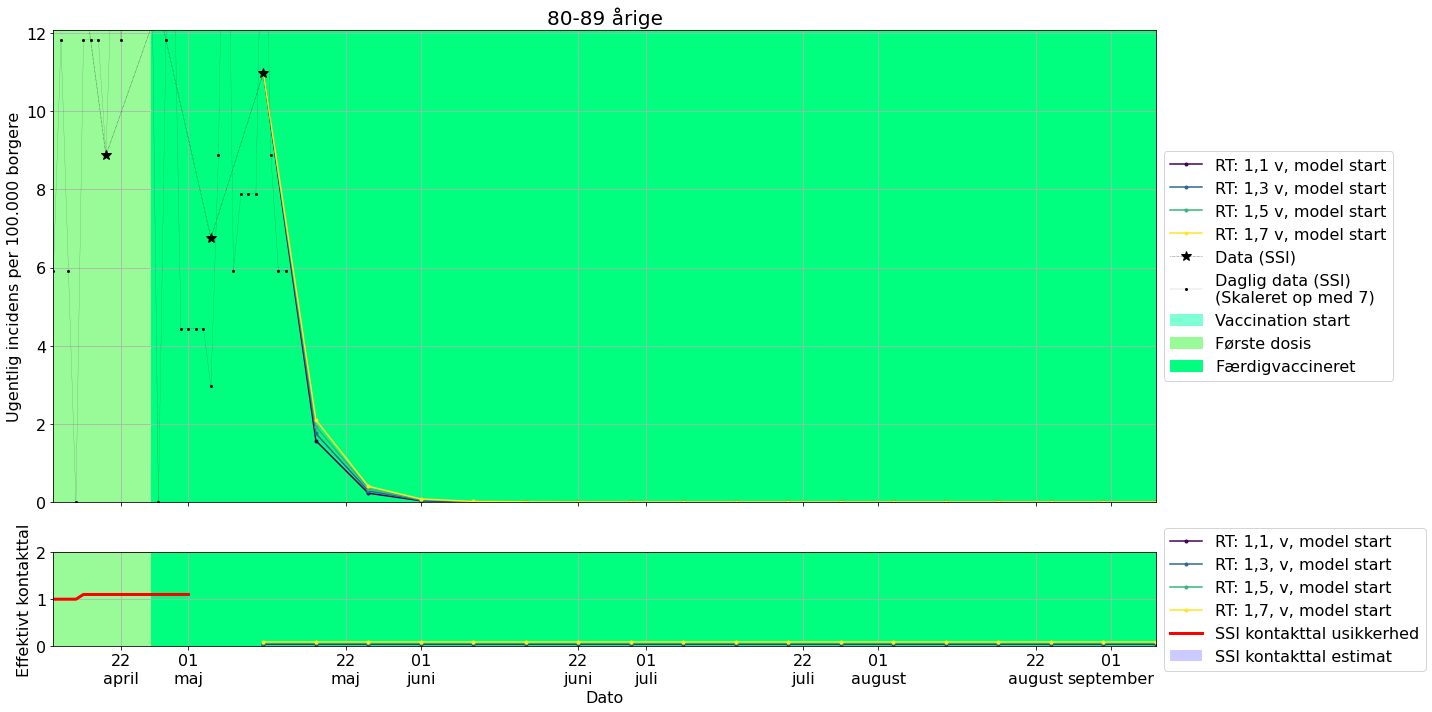

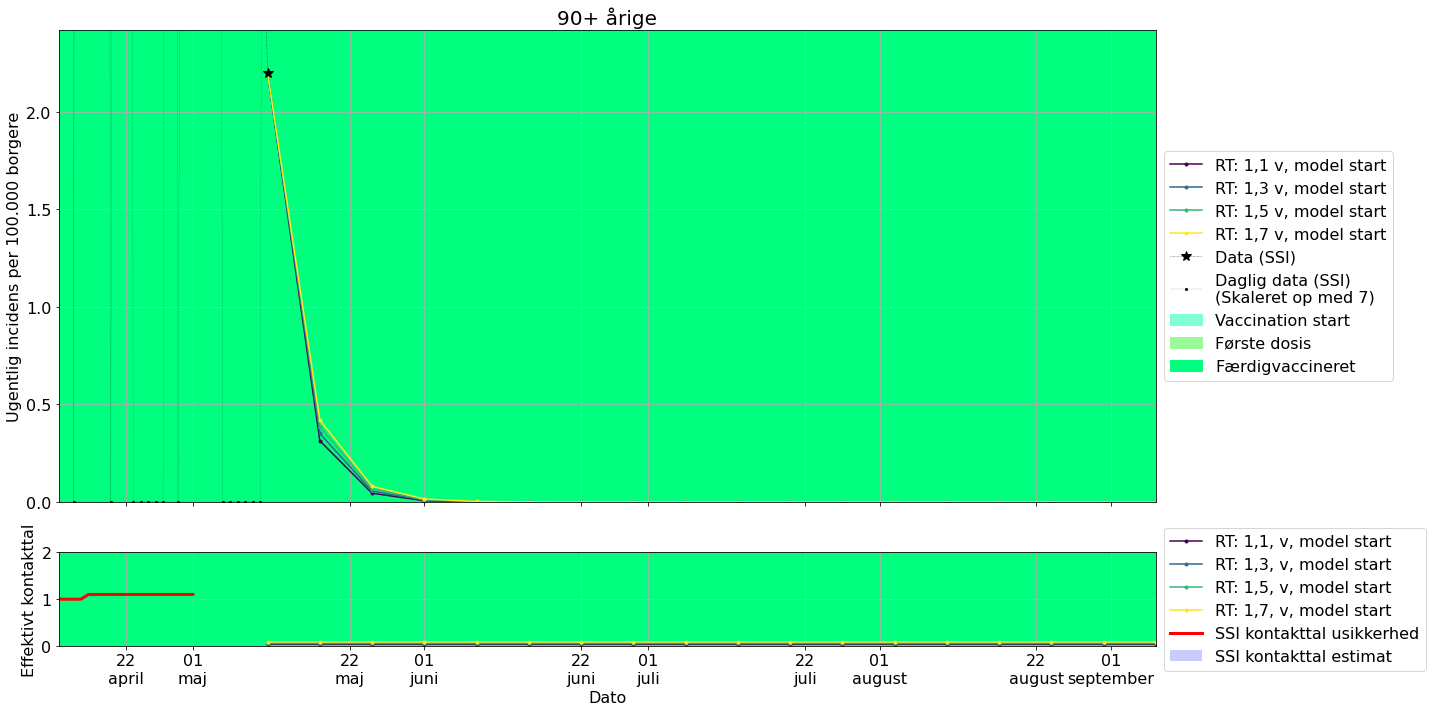

In [11]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1]

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

genTime = 4.7 / 7 # Generation time, in weeks
allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]
    print(curAge, curPopSize)

    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[5,1]})
    
    # this autofill span for entire plt heigt...
    ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    #fig2,ax2 = plt.subplots(1,1,figsize=(20,4))
    ax2.axvspan(vaccIni,vaccOne,color='aquamarine')#,label='Vaccination start')
    ax2.axvspan(vaccOne,vaccTwo,color='palegreen')#,label='Første dosis')
    ax2.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen')#,label='Færdigvaccineret')
    
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', 
                 label=f'RT: {curRT:.1f} v. model start'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
                 label=f'RT: {curRT:.1f}, v. model start'.replace('.',','), 
                 linewidth=1.5, markersize=6, color=cmap(k))

        curMax = max(100000*modelCount2/curPopSize)*1.1
        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(1,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
                if (filt and 100000*modelCount2[j+1]/curPopSize < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, 
                             pct_str, color="red", fontsize=14)
                    if i==1 and curRT==max(allRTs):
                        ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, 
                                 "+r", label="Nysmittet andel af aldersgruppe")


    ax2.fill_between(df_RT["SampleDate"], df_RT["uncertainty_lower"], df_RT["uncertainty_upper"], 
                     label="SSI kontakttal estimat", facecolor="blue", alpha=0.2)
    ax2.plot(df_RT["SampleDate"], df_RT["estimate"], label="SSI kontakttal usikkerhed", 
             color="red", linestyle="-")                    
    
    ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom=0, top=curMax)
    ax2.set_ylim(bottom=0, top=2)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()
    
    ax1.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
    
    ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

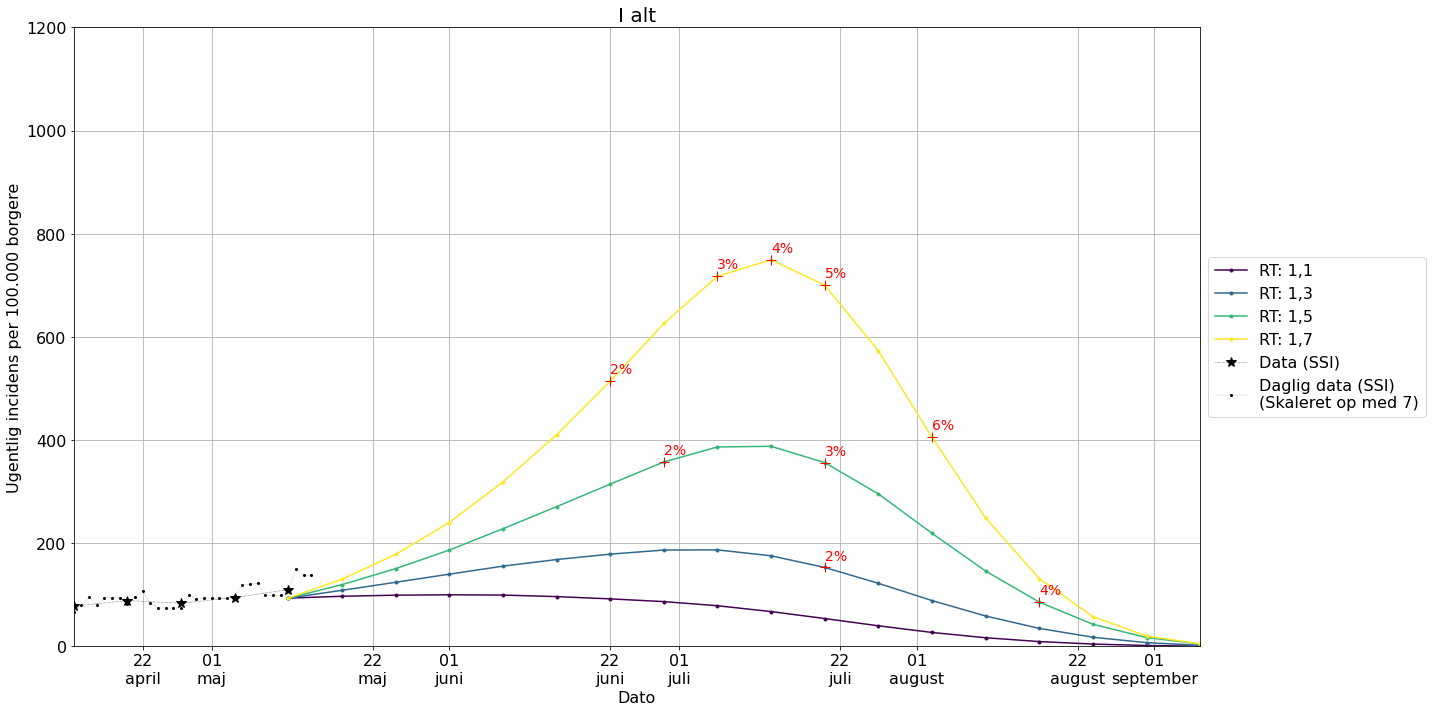

In [12]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,1.8,0.2)
genTime = 4.7 / 7 # Generation time, in weeks

tStart = plotDates[-1]
# print(tStart)

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []
modCN = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]

    
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]


    # for curRT in allRTs:
    RTArray = []
    CNArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        CN = contact_number(tSpanPlot, vaccKal[curAge], curRT)
        
        RTArray.append(modelCount2)
        CNArray.append(modelCount2)

    modArray.append(RTArray)
    modCN.append(CNArray)


RTmodels_avg = []
CNmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(1,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
            if filt and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

# Tables

Age  CaseHospRate Population      Start        End   RT         Count  \
0    10-19          0.01     273589 2021-05-11 2021-05-11  1.1  5.380000e+02   
1    10-19          0.01     273589 2021-05-11 2021-05-18  1.1  5.735543e+02   
2    10-19          0.01     273589 2021-05-11 2021-05-25  1.1  6.087861e+02   
3    10-19          0.01     273589 2021-05-11 2021-06-01  1.1  6.431587e+02   
4    10-19          0.01     273589 2021-05-11 2021-06-08  1.1  6.652305e+02   
5    10-19          0.01     273589 2021-05-11 2021-06-15  1.1  6.035715e+02   
6    10-19          0.01     273589 2021-05-11 2021-06-22  1.1  4.665153e+02   
7    10-19          0.01     273589 2021-05-11 2021-06-29  1.1  2.978076e+02   
8    10-19          0.01     273589 2021-05-11 2021-07-06  1.1  1.650990e+02   
9    10-19          0.01     273589 2021-05-11 2021-07-13  1.1  7.682974e+01   
10   10-19          0.01     273589 2021-05-11 2021-07-20  1.1  2.828761e+01   
11   10-19          0.01     273589 2021-05-11 2021-07-27  1.1  7.266170e+00   
12   10-19          0.01     273589 2021-05-11 2021-08-03  1.1  9.971636e-01   
13   10-19          0.01     273589 2021-05-11 2021-08-10  1.1  1.368361e-01   
14   10-19          0.01     273589 2021-05-11 2021-08-17  1.1  1.877722e-02   
15   10-19          0.01     273589 2021-05-11 2021-08-24  1.1  2.576685e-03   
16   10-19          0.01     273589 2021-05-11 2021-08-31  1.1  3.535829e-04   
17   10-19          0.01     273589 2021-05-11 2021-09-07  1.1  4.852006e-05   
18   10-19          0.01     273589 2021-05-11 2021-09-14  1.1  6.658115e-06   
19   10-19          0.01     273589 2021-05-11 2021-09-21  1.1  9.136530e-07   
20   10-19          0.01     273589 2021-05-11 2021-09-28  1.1  1.253751e-07   
21   10-19          0.01     273589 2021-05-11 2021-10-05  1.1  1.720447e-08   
22   10-19          0.01     273589 2021-05-11 2021-05-11  1.3  5.380000e+02   
23   10-19          0.01     273589 2021-05-11 2021-05-18  1.3  6.416336e+02   
24   10-19          0.01     273589 2021-05-11 2021-05-25  1.3  7.618859e+02   
..     ...           ...        ...        ...        ...  ...           ...   
855  I alt           NaN    5840045 2021-05-11 2021-09-21  1.5  5.353748e+00   
856  I alt           NaN    5840045 2021-05-11 2021-09-28  1.5  7.351136e-01   
857  I alt           NaN    5840045 2021-05-11 2021-10-05  1.5  1.009379e-01   
858  I alt           NaN    5840045 2021-05-11 2021-05-11  1.7  5.468776e+03   
859  I alt           NaN    5840045 2021-05-11 2021-05-18  1.7  7.602186e+03   
860  I alt           NaN    5840045 2021-05-11 2021-05-25  1.7  1.040713e+04   
861  I alt           NaN    5840045 2021-05-11 2021-06-01  1.7  1.402521e+04   
862  I alt           NaN    5840045 2021-05-11 2021-06-08  1.7  1.860920e+04   
863  I alt           NaN    5840045 2021-05-11 2021-06-15  1.7  2.394637e+04   
864  I alt           NaN    5840045 2021-05-11 2021-06-22  1.7  3.002253e+04   
865  I alt           NaN    5840045 2021-05-11 2021-06-29  1.7  3.656077e+04   
866  I alt           NaN    5840045 2021-05-11 2021-07-06  1.7  4.190218e+04   
867  I alt           NaN    5840045 2021-05-11 2021-07-13  1.7  4.377977e+04   
868  I alt           NaN    5840045 2021-05-11 2021-07-20  1.7  4.088782e+04   
869  I alt           NaN    5840045 2021-05-11 2021-07-27  1.7  3.346557e+04   
870  I alt           NaN    5840045 2021-05-11 2021-08-03  1.7  2.368390e+04   
871  I alt           NaN    5840045 2021-05-11 2021-08-10  1.7  1.454612e+04   
872  I alt           NaN    5840045 2021-05-11 2021-08-17  1.7  7.668335e+03   
873  I alt           NaN    5840045 2021-05-11 2021-08-24  1.7  3.370366e+03   
874  I alt           NaN    5840045 2021-05-11 2021-08-31  1.7  1.170978e+03   
875  I alt           NaN    5840045 2021-05-11 2021-09-07  1.7  2.882651e+02   
876  I alt           NaN    5840045 2021-05-11 2021-09-14  1.7  3.424278e+01   
877  I alt           NaN    5840045 2021-05-11 2021-09-21  1.7  4.065759e+00   
878  I 

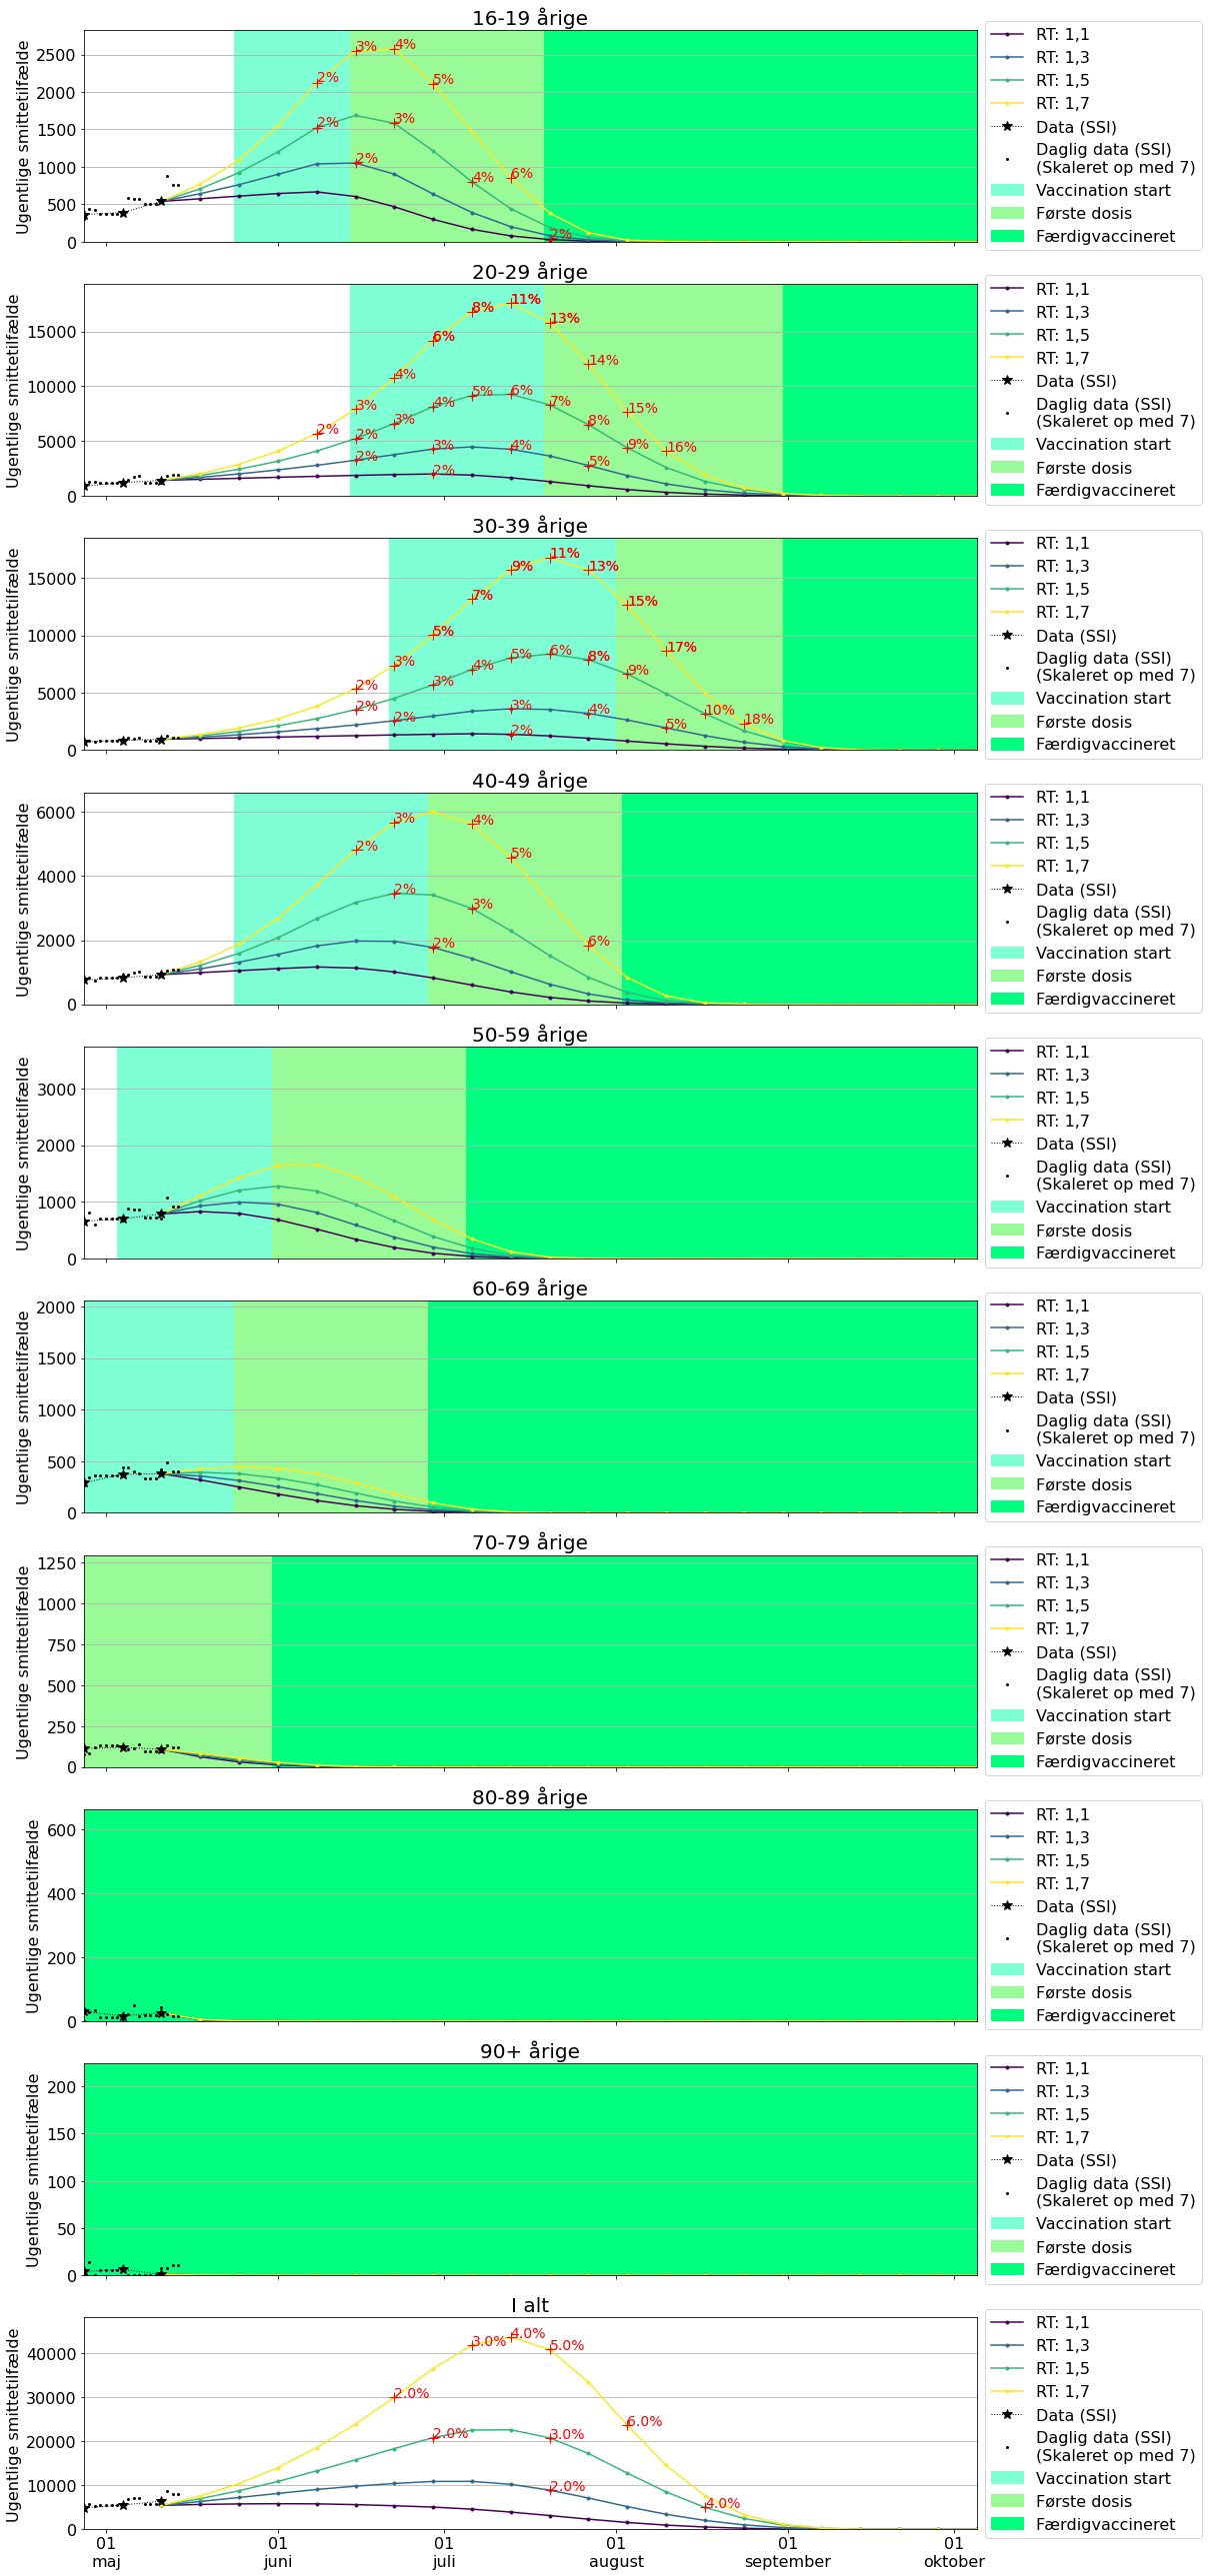

In [13]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]


modArray = []
for i, age in enumerate(allAges, 0):
    # print(i, age)
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # print(curAge, curPopSize)
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    # curAx.set_title(curAge+' årige')
    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        # for curRT in allRTs:
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]

            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)

    elif age == "I alt":
        RTmodels_avg = []
        for i in range(0,len(allRTs)):
            avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                              for j, col in enumerate(allAges[:-1])]) 
                       for k in range(len(tSpanPlot))]
            RTmodels_avg.append(avg_tmp)
        RTmodels_avg = np.array(RTmodels_avg)

        for k in range(0,len(allRTs)):
            curRT = allRTs[k]

            modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
            curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                     linewidth=1.5,markersize=6,color=cmap(k))

            top = modelMax = max(modelCount2)*1.1

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':None, 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and modelCount2[j+1] < top:
                        pct_str = f"{round(100*rmc[j+1]/curPopSize,0)}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


    #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df

In [14]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03", "2021-08-31"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                           \
End      2021-06-29    2021-08-03    2021-08-31    2021-06-29     2021-08-03   
RT              1.1           1.1           1.1           1.3            1.3   
Age                                                                            
10-19   3858.624009   4137.103688   4137.262231   5933.157958    6628.346608   
20-29  12398.283094  18748.500207  19316.515400  20146.024237   37136.252495   
30-39   8350.486675  14191.427405  15306.255051  13635.079175   29981.374413   
40-49   7277.311140   8612.651542   8623.962293  11509.616787   15037.629770   
50-59   3445.498459   3490.810986   3490.815197   4852.146339    4965.538370   
60-69    975.257344    979.070170    979.070390   1309.802054    1319.304827   
70-79    105.790347    105.791799    105.791799    127.142579     127.146210   
80-89      4.325499      4.325505      4.325505      4.936372       4.936385   
90+        0.166371      0.166371      0.166371      0.189867       0.189868   
I alt  39222.221785  54832.481001  56724.207583  62052.878741  104507.184487   

                                                                  \
End       2021-08-31    2021-06-29     2021-08-03     2021-08-31   
RT               1.3           1.5            1.5            1.5   
Age                                                                
10-19    6628.948441   8833.745720   10328.110780   10329.850821   
20-29   39136.823385  31513.154267   69136.804468   73823.843702   
30-39   34158.110064  21451.040127   59403.331155   69889.411276   
40-49   15082.032716  17611.993528   25628.005331   25761.272181   
50-59    4965.556247   6691.937710    6940.378328    6940.439300   
60-69    1319.305783   1728.854900    1749.652389    1749.655749   
70-79     127.146211    149.993794     150.001776     150.001777   
80-89       4.936385      5.540242       5.540271       5.540271   
90+         0.189868      0.213095       0.213096       0.213096   
I alt  111443.909081  95074.359552  191182.461773  208220.281822   

                                                    
End       2021-06-29     2021-08-03     2021-08-31  
RT               1.7            1.7            1.7  
Age                                                 
10-19   12762.360644   15605.986093   15609.936594  
20-29   47517.680460  117384.798539  124366.026279  
30-39   32562.248090  106586.311994  123364.208107  
40-49   26119.889079   42191.959165   42505.888563  
50-59    9064.849776    9556.958336    9557.134012  
60-69    2250.176885    2291.460160    2291.470224  
70-79     174.469541     174.485464     174.485468  
80-89       6.140619       6.140675       6.140675  
90+         0.236188       0.236191       0.236191  
I alt  141173.396895  324892.643860  351648.444184

In [15]:
print(model_df["End"].unique())
filt = (model_df["End"].isin(["2021-06-29", "2021-07-13", "2021-07-20", "2021-08-03", "2021-08-31"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

['2021-05-11T00:00:00.000000000' '2021-05-18T00:00:00.000000000'
 '2021-05-25T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-06-08T00:00:00.000000000' '2021-06-15T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-06-29T00:00:00.000000000'
 '2021-07-06T00:00:00.000000000' '2021-07-13T00:00:00.000000000'
 '2021-07-20T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-17T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-09-07T00:00:00.000000000'
 '2021-09-14T00:00:00.000000000' '2021-09-21T00:00:00.000000000'
 '2021-09-28T00:00:00.000000000' '2021-10-05T00:00:00.000000000']


HospCumul                                                      \
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31   
RT             1.1          1.1          1.1          1.1          1.1   
Age                                                                      
10-19    38.586240    41.005527    41.288404    41.371037    41.372622   
20-29   247.965662   318.880347   344.973583   374.970004   386.330308   
30-39   334.019467   445.742517   495.166380   567.657096   612.250202   
40-49   436.638668   495.570685   508.453832   516.759093   517.437738   
50-59   275.639877   279.145050   279.248270   279.264879   279.265216   
60-69   126.783455   127.269152   127.277731   127.279122   127.279151   
70-79    23.273876    23.274189    23.274195    23.274196    23.274196   
80-89     1.730200     1.730202     1.730202     1.730202     1.730202   
90+       0.066548     0.066548     0.066548     0.066548     0.066548   
I alt  1484.703993  1732.684217  1821.479144  1932.372177  1989.006182   

                                                                        \
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31   
RT             1.3          1.3          1.3          1.3          1.3   
Age                                                                      
10-19    59.331580    65.218327    66.022936    66.283466    66.289484   
20-29   402.920485   577.366418   650.272942   742.725050   782.736468   
30-39   545.403167   824.849621   966.485263  1199.254977  1366.324403   
40-49   690.577007   837.393606   874.930639   902.257786   904.921963   
50-59   388.171707   396.875664   397.186543   397.243070   397.244500   
60-69   170.274267   171.478631   171.504813   171.509627   171.509752   
70-79    27.971367    27.972146    27.972163    27.972166    27.972166   
80-89     1.974549     1.974554     1.974554     1.974554     1.974554   
90+       0.075947     0.075947     0.075947     0.075947     0.075947   
I alt  2286.700076  2903.204914  3156.425801  3509.296643  3719.049237   

                                                                        \
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31   
RT             1.5          1.5          1.5          1.5          1.5   
Age                                                                      
10-19    88.337457   100.723620   102.620119   103.281108   103.298508   
20-29   630.263085   998.813211  1165.013230  1382.736089  1476.476874   
30-39   858.041605  1460.990589  1795.847017  2376.133246  2795.576451   
40-49  1056.719612  1373.906818  1465.126287  1537.680320  1545.676331   
50-59   535.355017   554.276745   555.070241   555.230266   555.235144   
60-69   224.751137   227.372926   227.440885   227.454811   227.455247   
70-79    32.998635    33.000337    33.000381    33.000391    33.000391   
80-89     2.216097     2.216108     2.216108     2.216108     2.216108   
90+       0.085238     0.085238     0.085238     0.085238     0.085238   
I alt  3428.767883  4751.385592  5346.419506  6217.817578  6739.020293   

                                                                          
End     2021-06-29   2021-07-13   2021-07-20    2021-08-03    2021-08-31  
RT             1.7          1.7          1.7           1.7           1.7  
Age                                                                       
10-19   127.623606   150.839942   154.666681    156.059861    156.099366  
20-29   950.353609  1638.191530  1954.682587   2347.695971   2487.320526  
30-39  1302.489924  2458.514828  3130.204199   4263.452480   4934.568324  
40-49  1567.193345  2179.953730  2371.171129   2531.517550   2550.353314  
50-59   725.187982   762.377778   764.163223    764.556667    764.570721  
60-69   292.522995   297.698456   297.854630    297.889821    297.891129  
70-79    38.383299    38.386675    38.386779     38.386802     38.386803  
80-89     2.456247     2.456269     2.456270      2.456270      2.456270 

# OLD STUFF BELOW

['2021-05-11' '2021-05-18' '2021-05-25' '2021-06-01' '2021-06-08'
 '2021-06-15' '2021-06-22' '2021-06-29' '2021-07-06' '2021-07-13'
 '2021-07-20' '2021-07-27' '2021-08-03' '2021-08-10' '2021-08-17'
 '2021-08-24' '2021-08-31' '2021-09-07' '2021-09-14' '2021-09-21'
 '2021-09-28' '2021-10-05']
10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458
I alt 5840045


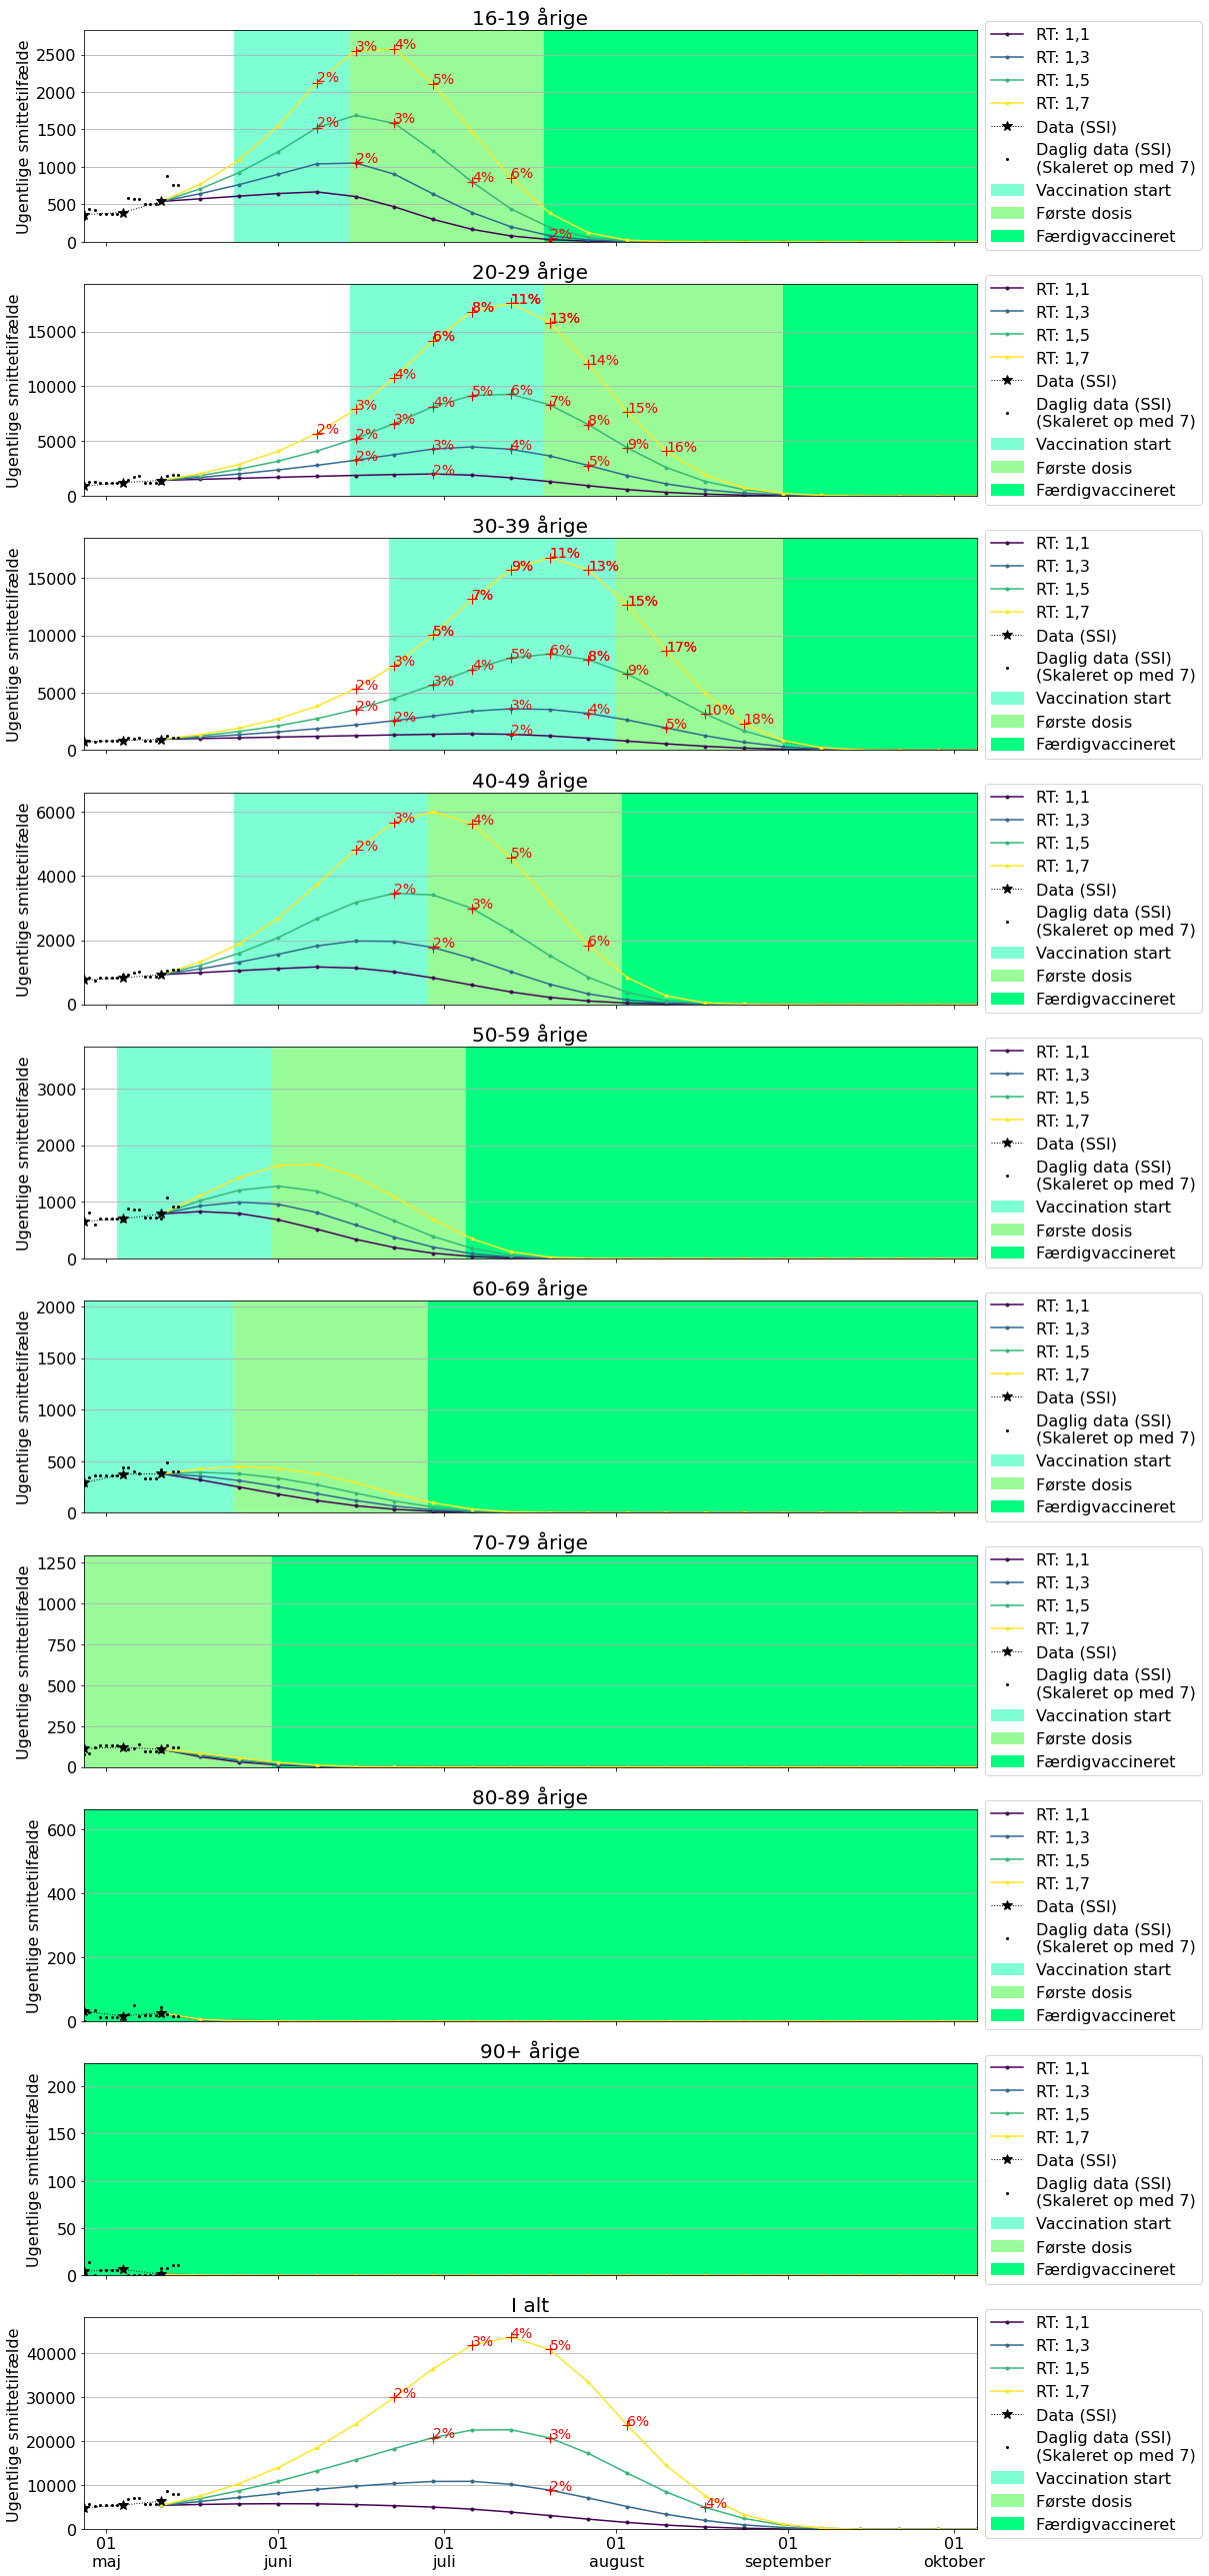

In [16]:
# Same thing, but in one large plot. Starting in the middle of april

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')
# tStart = plotDates[-1]
#print(tStart)

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

print(tSpanPlot)

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

modArray = []
for i, age in enumerate(allAges, 0):
        curAx = allAxes.flatten()[i]
        curAge = allAges[i]
        curPopSize = DK_age[1:][i]
        
        print(curAge, curPopSize)
        vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

        curData = dfCaseDiff[curAge].values
        curDataDaily = dfCaseDiffDaily[curAge].values

        iniCount = iniRow[curAge].values[0]

        dataMax = max(curData)

        curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
        curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
        curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

        #curAx.set_title(curAge+' årige')
        curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
        if (curAge == 'I alt'):
            curAx.set_title(curAge)

        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            # for curRT in allRTs:
            RTArray = []
            for k in range(0,len(allRTs)):
                curRT = allRTs[k]

                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
                
                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                           linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                RTArray.append(modelCount2)
                
                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                        if filt and (modelCount2[j+1] < top):
                            pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)

        elif age == "I alt":
            RTmodels_avg = []
            for i in range(0,len(allRTs)):
                avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                                  for j, col in enumerate(allAges[:-1])]) 
                           for k in range(len(tSpanPlot))]
                RTmodels_avg.append(avg_tmp)
            RTmodels_avg = np.array(RTmodels_avg)

            for k in range(0,len(allRTs)):
                modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
                curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                         linewidth=1.5,markersize=6,color=cmap(k))

                top = modelMax = max(modelCount2)*1.1
                
                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                        if filt and modelCount2[j+1] < top:
                            pct_str = f"{int(round(100*rmc[j+1]/curPopSize,0))}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


        #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
        curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
                   linewidth=0.25, markersize=4)

        curAx.set_ylim(bottom=0, top=top)

        curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

        curAx.set_xlim(xLims)

        curAx.set_ylabel('Ugentlige smittetilfælde')
        # curAx.set_xlabel('Dato')

        # curAx.grid(color='black')
        curAx.grid(axis='y')

        # curAx.legend()
        curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')

# curDates    
#dfCaseDiff[curAge]

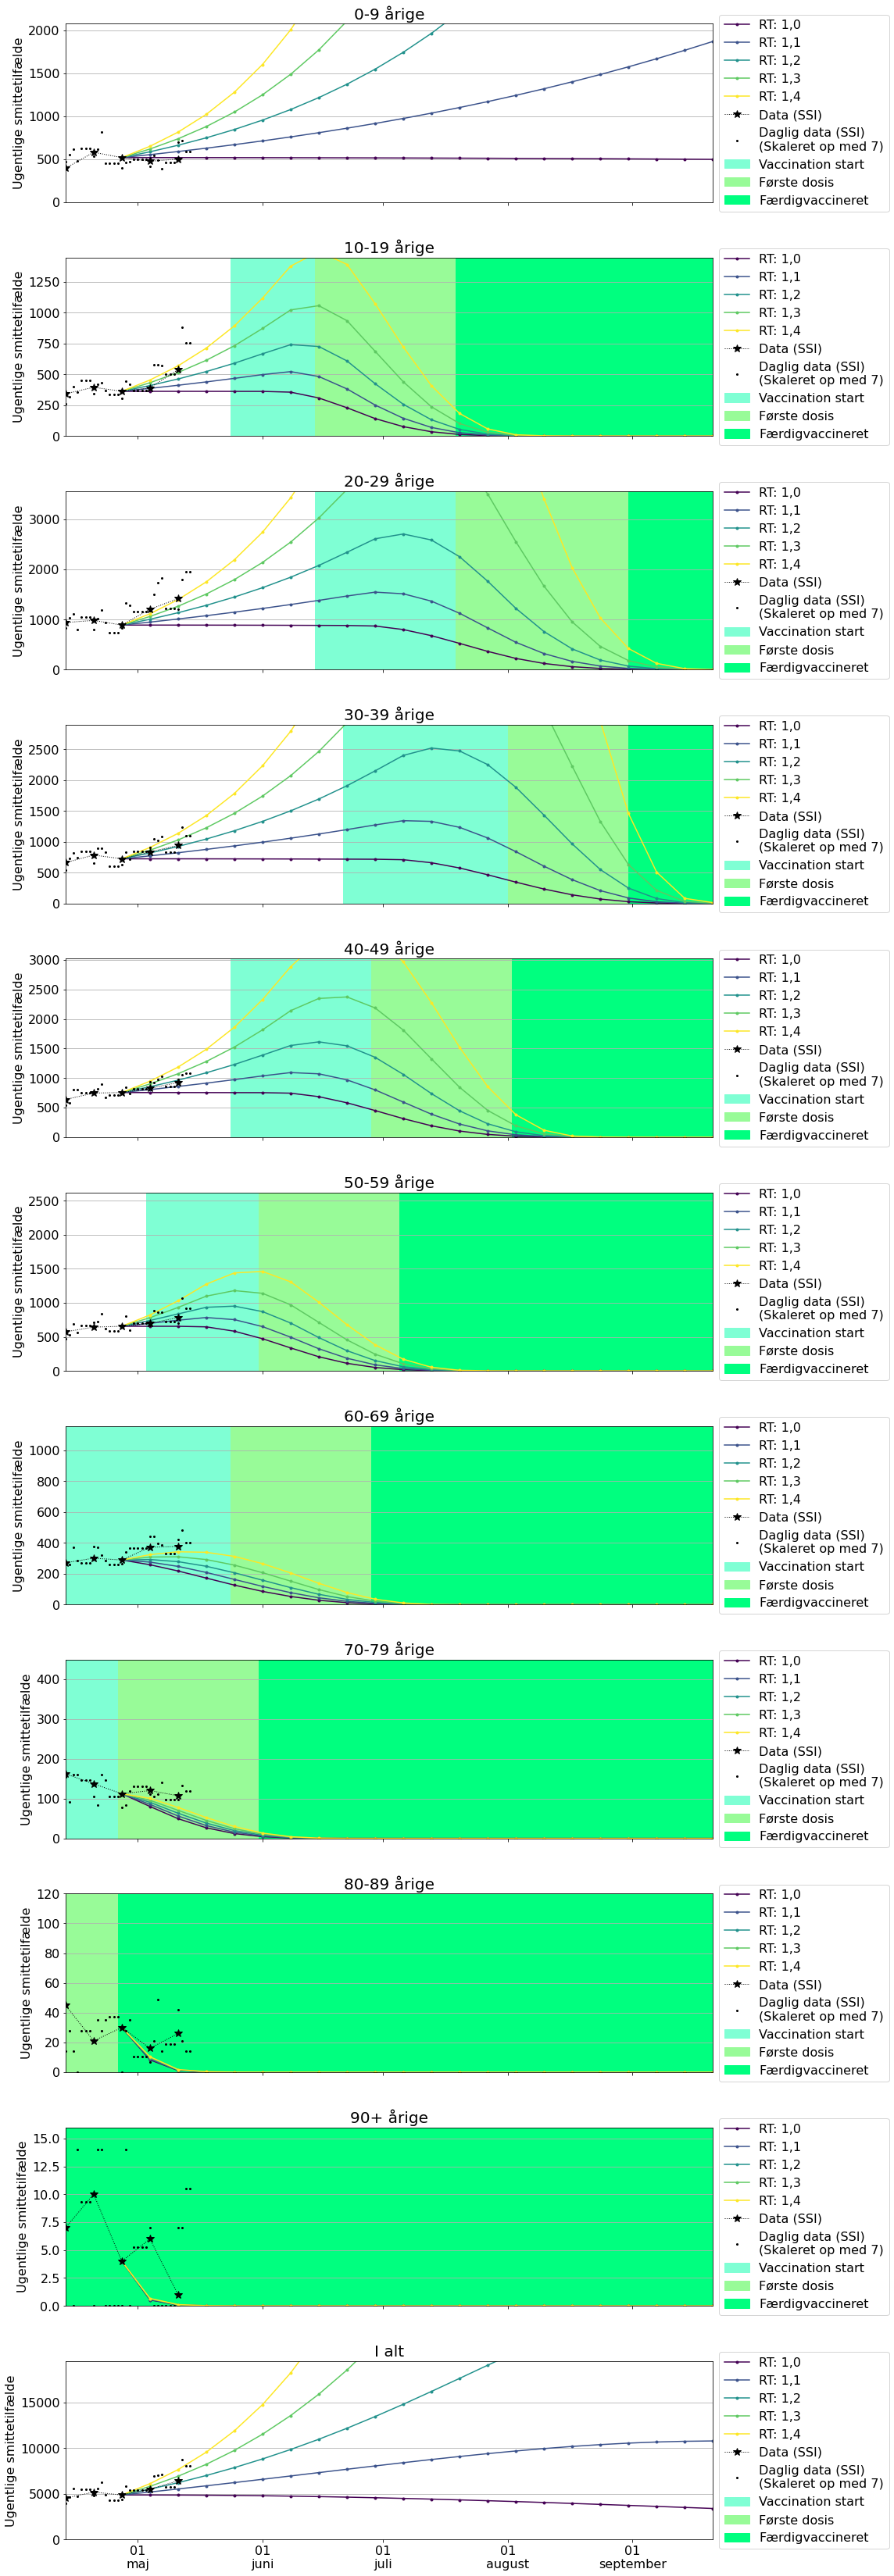

In [17]:
# Same thing, but in one plot, and starting at the end of april

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns


# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig,allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = False

tStart = np.datetime64('2021-04-27')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniRow


for i in range(0,len(allAges)):
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    # curAge = '30-39'
    # curAge = '40-49'
    # curAge = '50-59'
    # vaccIni = np.datetime64('2021-06-21')
    # vaccOne = np.datetime64('2021-08-01')
    # vaccTwo = np.datetime64('2021-08-31')
    
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)
    #max(dataMax, modelMax)
    top = int(showMax)*dataMax*1.1 + (1-int(showMax))*iniCount*4 


    # ax1.bar(vaccIni,max(curData),color='springgreen',label='Vaccination påbegyndes')
    # ax1.bar(vaccOne,max(curData),color='limegreen',label='Første dosis afsluttet')
    # ax1.bar(vaccTwo,max(curData),color='darkgreen',label='Forventet færdigvaccineret')

    # curAx.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='springgreen',label='Vaccination start')
    # curAx.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='limegreen',label='Første dosis')
    # curAx.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='forestgreen',label='Færdigvaccineret')
    
    # curAx.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='aquamarine',label='Vaccination start')
    # curAx.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='palegreen',label='Første dosis')
    # curAx.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='springgreen',label='Færdigvaccineret')

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    
    curAx.set_title(curAge+' årige')
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    genTime = 4.7 / 7 # Generation time, in weeks

    allRTs = np.arange(1.0,1.5,0.1)
    # allRTs = np.arange(1.0,1.4,0.1)

    lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

    cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount = iniCount * (curRT**(genTime*tSpan))
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)

        modelSum = modelCount.sum()
        curAx.plot(tSpanPlot,modelCount,'.-',# label=f'RT: {curRT:.1f}'.replace('.',','),
                   linewidth=1.5,markersize=6,color=cmap(k), alpha=0)
        # curAx.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','),color=cmap(k))

        curAx.plot(tSpanPlot,modelCount2,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),
                   linewidth=1.5,markersize=6,color=cmap(k))


    curAx.plot(plotDates,curData,'k*:',linewidth=1,markersize=10,label=f'Data (SSI)')
    # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
    curDataDaily = dfCaseDiffDaily[curAge].values
    curAx.plot(plotDatesDaily,curDataDaily*7,'k.',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')



    if showMax:
        curAx.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede, anden bølge')
        
    curAx.set_ylim(bottom = 0,top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper_UltimoApril')


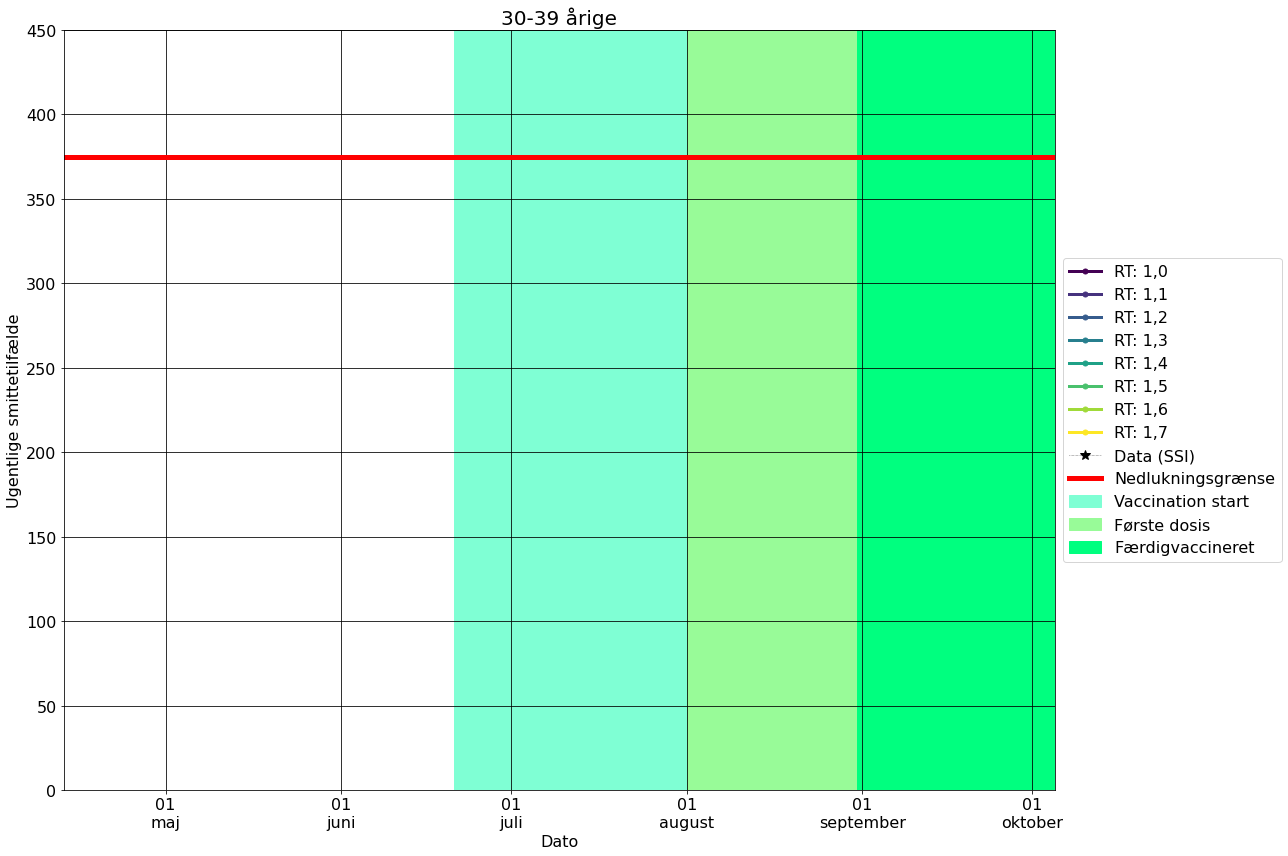

In [18]:


# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret
fig,ax1 = plt.subplots(1,1,figsize=(18,12))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = False

# plotDates is the dates used for plotting the data. Use the date of the last datapoint
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*4,tSpanPlot[-1]]



# curAge = '20-29'
curAge = '30-39'
# curAge = '40-49'
# curAge = '50-59'

# Get the vaccination days from calendar
vaccIni = vaccKal[curAge][0]
vaccOne = vaccKal[curAge][1]
vaccTwo = vaccKal[curAge][2]


curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]


# ax1.fill_between([vaccIni,vaccOne],[max(curData),max(curData)],color='aquamarine',label='Vaccination start')
# ax1.fill_between([vaccOne,vaccTwo],[max(curData),max(curData)],color='palegreen',label='Første dosis')
# ax1.fill_between([vaccTwo,tSpanPlot[-1]],[max(curData),max(curData)],color='springgreen',label='Færdigvaccineret')

ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

ax1.set_title(curAge+' årige')

genTime = 4.7 / 7 # Generation time, in weeks

lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap to use for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    modelCount = iniCount * (curRT**(genTime*tSpan))
    modelSum = modelCount.sum()

    ax1.plot(tSpanPlot,modelCount,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),color=cmap(k))
    # ax1.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','),color=cmap(k))
    # ax1.plot(tSpanPlot,modelCount/7,'.-',label=f'RT: {curRT:.1f}'.replace('.',','),color=cmap(k))


ax1.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data (SSI)')
# ax1.plot(plotDates,curData/7,'k*:',linewidth=0.5,label=f'Data (SSI)')


ax1.plot([plotDates[0],tSpanPlot[-1]],[375,375],'r',linewidth=5,label='Nedlukningsgrænse')


if showMax:
    dataMax = max(curData)
    ax1.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede\nAnden bølge')
    ax1.set_ylim(bottom = 0,top=dataMax*1.1)
else:
    # ax1.set_ylim(bottom = 0,top=iniCount*8/7)
    ax1.set_ylim(bottom = 0,top=450)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlige smittetilfælde')
# ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

# ax1.legend()
ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()


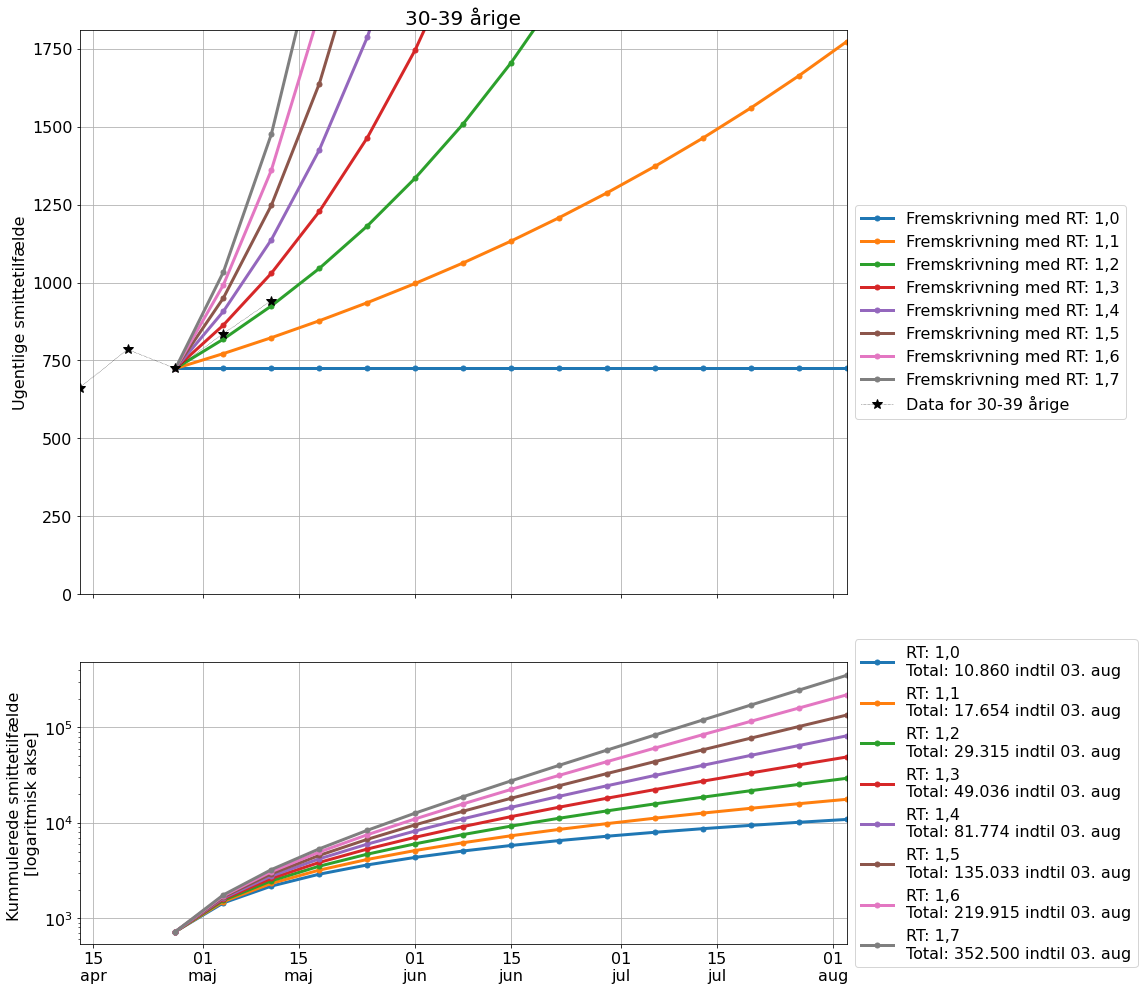

In [19]:
## First test plot to show methodology

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(16,14), gridspec_kw={'height_ratios': [2, 1]})

# Set which age to show
curAge = '30-39'

# Whether to display the maximal data so far
showMax = False

# tStart = np.datetime64('2021-04-13')
tStart = np.datetime64('2021-04-27')

# Number of weeks to go forward
tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# Define the x limits to show
xLims = [tStart-tDelta*2,tSpanPlot[-1]]

curData = dfCaseDiff[curAge].values

# Find tStart in date-list, get data at the given date
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

genTime = 4.7 / 7 # Generation time, in weeks

# Format the last date for showing in legend
lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

# Go through some RT's
minRT = 1.0
maxRT = 1.7
allRTs = np.arange(minRT,maxRT+0.1,0.1)

for curRT in allRTs:
    
    # Calculate prediction
    modelCount = iniCount * (curRT**(genTime*tSpan))
    # Plot prediction
    ax1.plot(tSpanPlot,modelCount,'.-',label=f'Fremskrivning med RT: {curRT:.1f}'.replace('.',','))

    # Summarize everything under the prediction curve
    modelSum = modelCount.sum()
    # Plot cummulative sum, and show final value in legend
    ax2.plot(tSpanPlot,np.cumsum(modelCount),'.-',label=f'RT: {curRT:.1f}'.replace('.',',')+f'\nTotal: {modelSum:,.0f} indtil {lastDateStr}'.replace(',','.')) 

# Plot the data
ax1.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')

# If flag is positive, plot the previously highest value in data
if showMax:
    dataMax = max(curData)
    ax1.plot(plotDates,dataMax * np.ones(curData.shape),color='grey',linewidth=1,label='Maksimalt antal smittede, anden bølge')
    ax1.set_ylim(bottom = 0,top=dataMax*1.1)
else:
    ax1.set_ylim(bottom = 0,top=iniCount*2.5)

# Readable dates in x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlige smittetilfælde')

ax2.set_yscale('log')
ax2.set_ylabel('Kummulerede smittetilfælde \n[logaritmisk akse]')

ax1.set_title(curAge+' årige')

ax1.grid()
ax2.grid()

# Legend outside plot
ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

In [20]:
# tSpan = np.arange(0,14)
# tSpan = np.arange(-4,14)


# curData = dfCaseDiff['20-29']
# # curData = dfCaseDiff['40-49']
# # curData = dfCaseDiff['I alt']
# iniCount = dfCaseDiff.iloc[-5,2]
# # iniCount = dfCaseDiff.iloc[-5,4]
# # iniCount = dfCaseDiff.iloc[-5,-1]
# firstDate = np.datetime64('2021-04-13')
# # iniCount = dfCaseDiff.iloc[-3,-1]
# # firstDate = np.datetime64('2021-04-27')
# # iniCount = dfCaseDiff.iloc[-1,-1]
# # firstDate = np.datetime64('2021-05-11')
# tSpanPlot = np.arange(firstDate,firstDate+np.timedelta64(7*14,'D'),np.timedelta64(7,'D'))
# tSpanPlot = np.arange(firstDate-np.timedelta64(7*4,'D'),firstDate+np.timedelta64(7*14,'D'),np.timedelta64(7,'D'))


# fig,ax1 = plt.subplots(1,1)

# genTime = 4.7 / 7

# curRT = 1.0
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.1
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.2
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.3
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 
# curRT = 1.4
# curCount = iniCount * (curRT**(genTime*tSpan))
# curSum = curCount.sum()
# ax1.plot(tSpanPlot,curCount,':',label=f'Fremskrivning med {curRT:.1f}, Total: {curSum:.0f}') 


# ax1.plot(plotDates,curData,'*-')
# # ax1.plot(plotDates,dfCaseDiff['I alt'],'k.--')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# # ax1.set_ylim(bottom = 0,top=max(curData))
# ax1.set_ylim(bottom = 0,top=iniCount*2)
# # ax1.set_xlim([tSpanPlot[0],tSpanPlot[-1]])
# ax1.set_xlim([tSpanPlot[0],np.datetime64('2021-06-01')])

# ax1.legend()

# plt.show()

In [21]:
a = np.array([2, 4, 7])
np.diff(a)

array([2, 3])